In [1]:
from pyfusion.boards import PCB_LOB
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
%matplotlib widget
from scipy import signal, interpolate
import pandas as pds

In [13]:
p=PCB_LOB()
p.open()
q=0.0002462198777370319/0.9516164052655757

In [27]:
NPoints=int(1e7)
s=p.get_samples(NPoints*2, flush_before=True)

In [28]:
s

[array([2, 1, 1, ..., 1, 1, 1], shape=(20000001,), dtype=int16),
 array([-100, -119, -124, ...,  110,  104,   91],
       shape=(20000000,), dtype=int16),
 array([0, 0, 0, ..., 0, 1, 0], shape=(20000000,), dtype=int16),
 array([-1, -1, -1, ..., -1, -1, -1], shape=(20000000,), dtype=int16)]

In [29]:
s=((s[1]-np.mean(s[1]))*q)[NPoints:]
#s=(s[1]*q)[NPoints:]

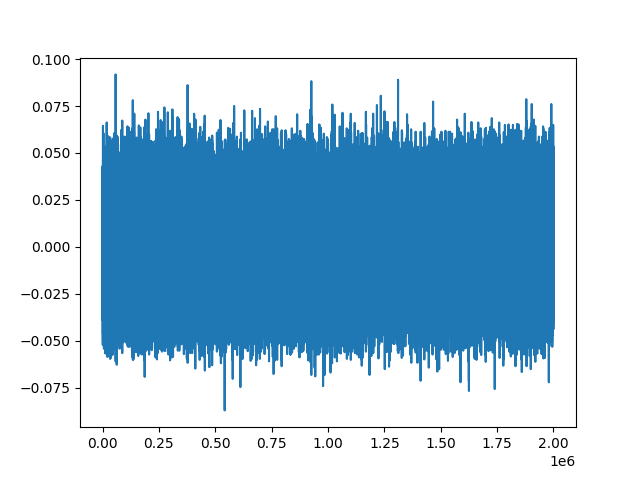

In [30]:
plt.figure()
plt.plot(s[:2000000])

In [31]:
np.save("Bruit PCB 10Hz-100kHz 2NDStage&bobine de 40 cm",s)
del s

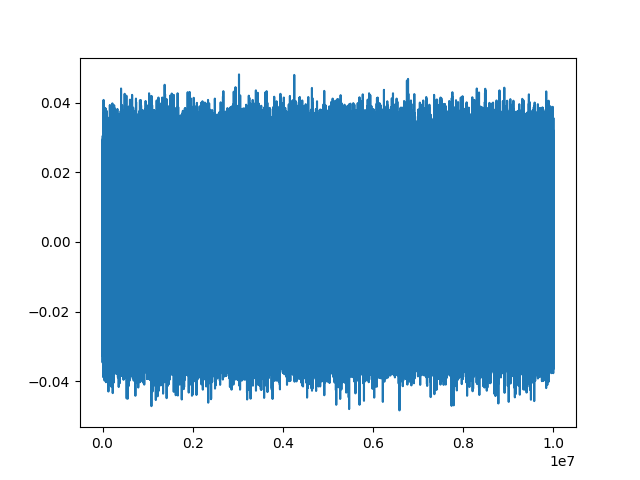

In [4]:
s=np.load("PCB, SMB doré,470kohm, Tiroir,Boite , R6=3.3kohm.npy")
plt.figure()
plt.plot(s)
plt.show()

In [18]:
np.save(f"Acq-WF--{datetime.now().isoformat()}", s)

In [23]:
df=pds.read_csv("/home/jli/Documents/lpp/TF_Bobine_amp1stStage_S=210*140.csv", index_col=[0])
G = df["Channel 2 Magnitude (dB)"]-df["Channel 1 Magnitude (dB)"]

u0=4*np.pi*10e-7
h=0.21
l=0.14
R=50
C=2*u0*np.sqrt(h**2 +l**2)/(np.pi*R*l*h)

G=G-20*np.log10(C)
print(G)

Frequency (Hz)
50.000000         129.880595
53.412578         128.172313
57.058069         127.050191
60.952371         123.052260
65.112465         125.179301
                     ...    
767902.120363     145.819947
820312.633474     148.071879
876300.245557     150.726860
936109.099174     154.178637
1000000.000000    153.588129
Length: 151, dtype: float64


[]

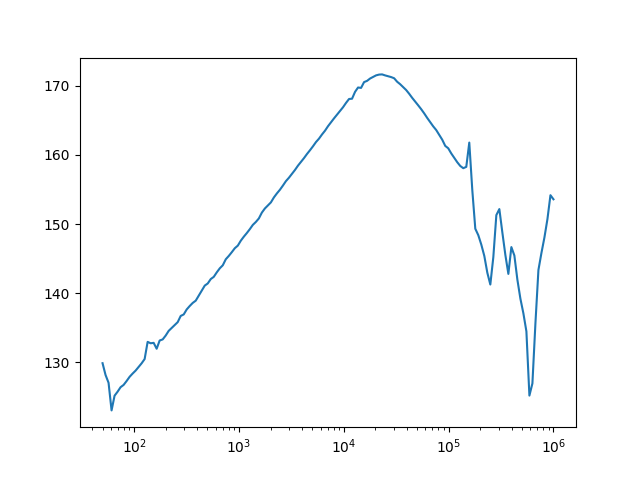

In [14]:
plt.figure()
plt.plot(G)
plt.semilogx()

In [21]:
fG = interpolate.interp1d(G.index.values, G.values)

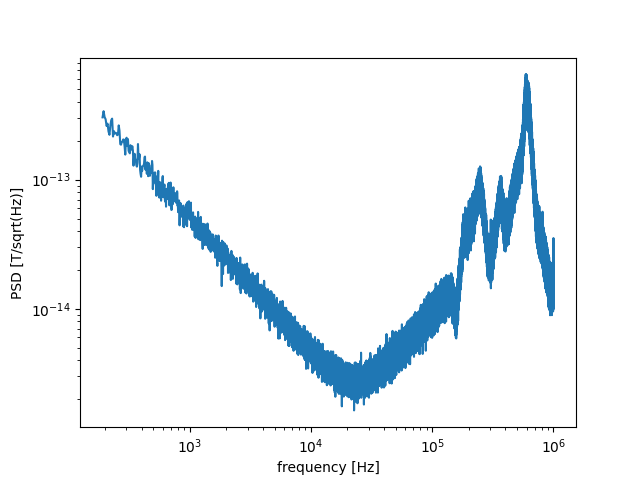

In [22]:
plt.figure()
f, Pxx_den = signal.welch(s, 2e6, nperseg=2**19, detrend='linear', average='median')
f=f[50:]
Pxx_den = Pxx_den[50:]
PSD=np.sqrt(Pxx_den)/(10**(fG(f)/20))
with open('NEMI_Bobine&Amp_1stStage.npy', 'wb') as e:
    np.save(e,PSD)
plt.loglog(f, PSD)
#plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [T/sqrt(Hz)]')
plt.show()

In [37]:
s_1=p.get_samples(int(1e7), flush_before=True)

In [38]:
s_1

[array([0, 1, 0, ..., 1, 0, 1], shape=(10000001,), dtype=int16),
 array([ 117, -181,   97, ...,   80,  163,  162],
       shape=(10000000,), dtype=int16),
 array([1, 1, 1, ..., 1, 1, 1], shape=(10000000,), dtype=int16),
 array([0, 0, 0, ..., 0, 0, 0], shape=(10000000,), dtype=int16)]

In [39]:
s_1=(s_1[1]-np.mean(s_1[1]))*5/2**16

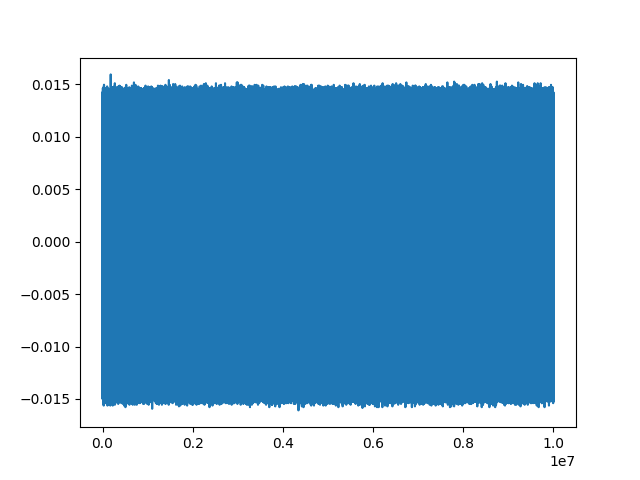

In [40]:
plt.figure()
plt.plot(s_1)

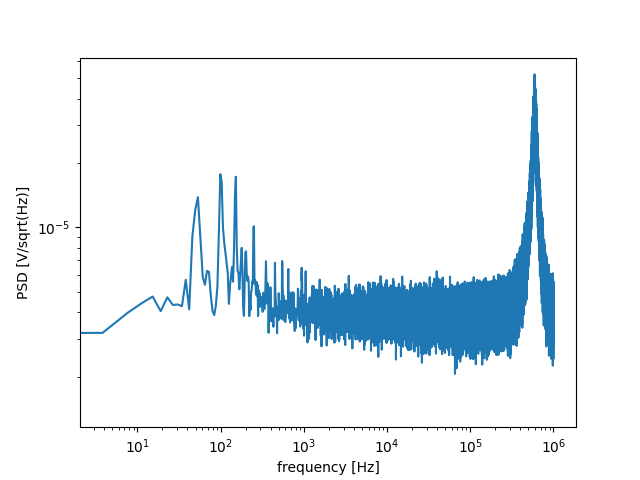

In [46]:
plt.figure()
f, Pxx_den = signal.welch(s_1, 2e6, nperseg=2**19, detrend='linear', average='median')
p1=plt.loglog(f, np.sqrt(Pxx_den))
#plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V/sqrt(Hz)]')
plt.show()

In [47]:
df_1=pds.read_csv("/home/jli/Documents/lpp/TF_AMP_JFE_Ids=1.19mA,R6=3.3k,R7=500_V2.csv", index_col=[0], sep=",")
G_1 = df_1["Channel 2 Magnitude (dB)"]-df_1["Channel 1 Magnitude (dB)"]+33


[]

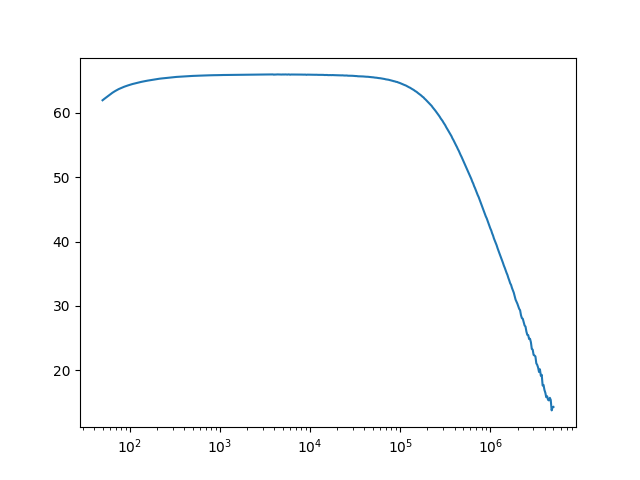

In [48]:
plt.figure()
plt.plot(G_1)
plt.semilogx()

In [49]:
fG_1 = interpolate.interp1d(G_1.index.values, G_1.values)

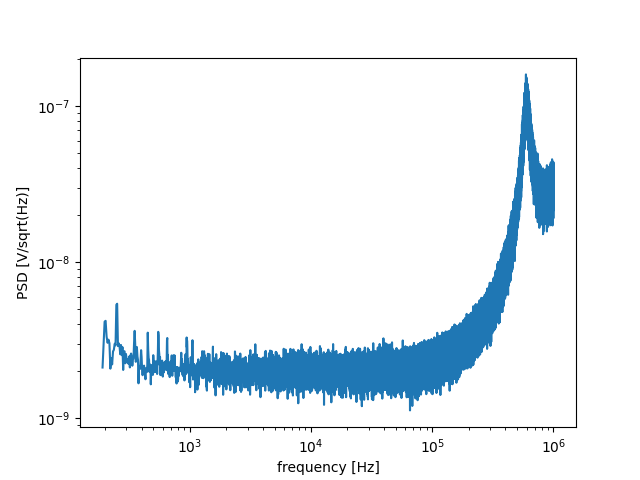

In [50]:
plt.figure()
f_1, Pxx_den_1 = signal.welch(s_1, 2e6, nperseg=2**19, detrend='linear', average='median')
f_1=f_1[50:]
Pxx_den_1 = Pxx_den_1[50:]
PSD_1=np.sqrt(Pxx_den_1)/(10**(fG_1(f_1)/20))

plt.loglog(f_1, PSD_1)
#plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V/sqrt(Hz)]')
plt.show()

In [34]:
s_Bis=p.get_samples(int(1e7), flush_before=True)

In [35]:
s_Bis

[array([0, 0, 0, ..., 0, 1, 0], shape=(10000001,), dtype=int16),
 array([ 143,  -45, -124, ..., -145,  117,  153],
       shape=(10000001,), dtype=int16),
 array([0, 0, 0, ..., 0, 0, 0], shape=(10000001,), dtype=int16),
 array([0, 0, 0, ..., 0, 0, 0], shape=(10000001,), dtype=int16)]

In [36]:
s_Bis=(s_Bis[1]-np.mean(s_Bis[1]))*5/2**16

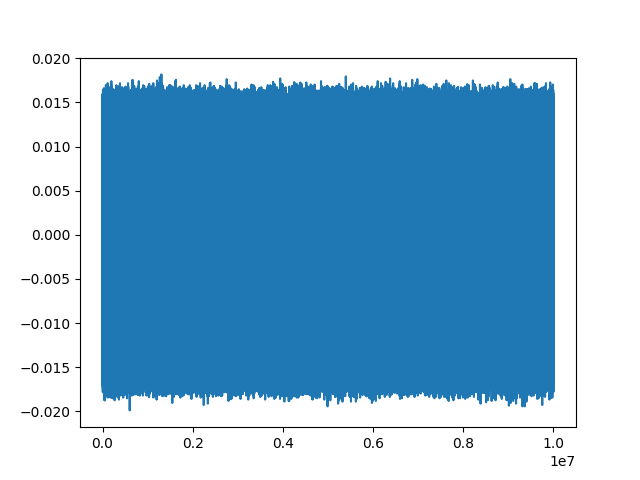

In [37]:
plt.figure()
plt.plot(s_Bis)

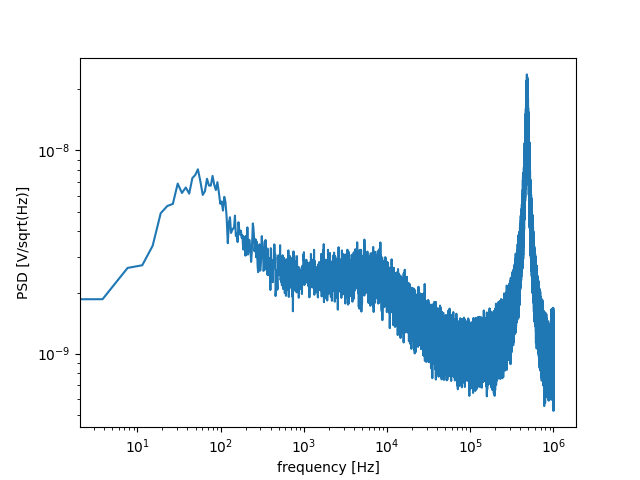

In [38]:
plt.figure()
f_Bis, Pxx_den = signal.welch(s_Bis, 2e6, nperseg=2**19, detrend='linear', average='median')
plt.loglog(f_Bis, np.sqrt(Pxx_den)/(10**(69/20)))
#plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V/sqrt(Hz)]')
plt.show()

In [39]:
df_Bis=pds.read_csv("/home/jli/Documents/lpp/TF_AMP_JFE_Bis_V2.csv", index_col=[0], sep=",")
G_Bis = df_Bis["Channel 2 Magnitude (dB)"]-df_Bis["Channel 1 Magnitude (dB)"]+33


[]

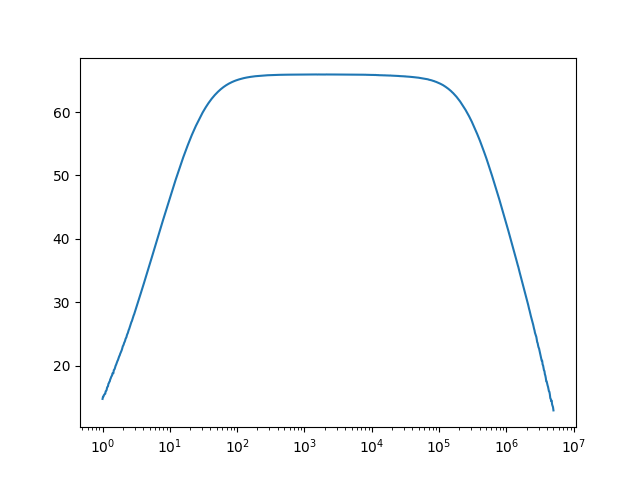

In [40]:
plt.figure()
plt.plot(G_Bis)
plt.semilogx()

In [41]:
fG_Bis = interpolate.interp1d(G_Bis.index.values, G_Bis.values)

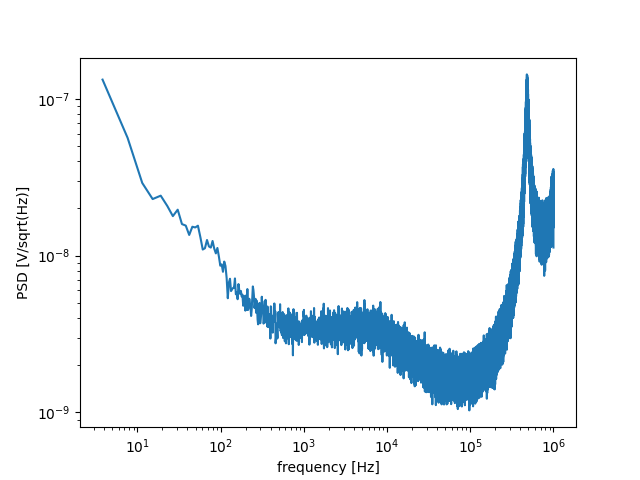

In [42]:
plt.figure()
f_Bis, Pxx_den = signal.welch(s_Bis, 2e6, nperseg=2**19, detrend='linear', average='median')
f_Bis=f_Bis[1:]
Pxx_den = Pxx_den[1:]
PSD_Bis=np.sqrt(Pxx_den)/(10**(fG_Bis(f_Bis)/20))
with open('PSD_Bis.npy', 'wb') as e:
    np.save(e,PSD_Bis)
plt.loglog(f_Bis, PSD_Bis)
#plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V/sqrt(Hz)]')
plt.show()

In [58]:
p=PCB_LOB()
p.open()

In [59]:
s_BisBis=p.get_samples(int(1e7), flush_before=True)

In [60]:
s_BisBis

[array([0, 1, 0, ..., 1, 0, 1], shape=(10000001,), dtype=int16),
 array([ 175, -166,  186, ...,  166, -167,   70],
       shape=(10000000,), dtype=int16),
 array([1, 1, 2, ..., 1, 1, 1], shape=(10000000,), dtype=int16),
 array([5127, 5127, 5127, ..., 5139, 5139, 5139],
       shape=(10000000,), dtype=int16)]

In [61]:
s_BisBis=(s_BisBis[1]-np.mean(s_BisBis[1]))*5/2**16

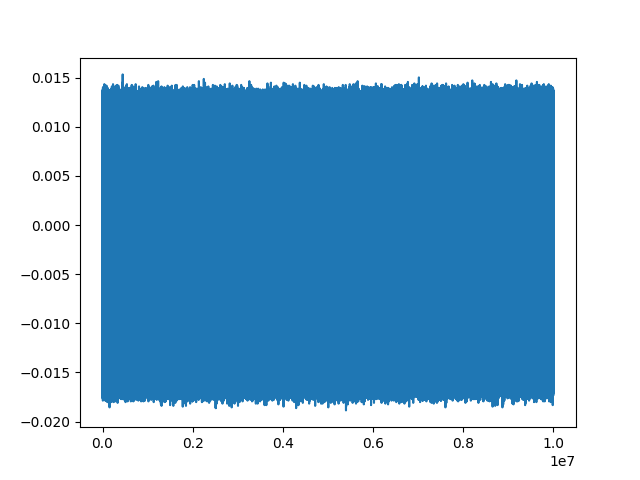

In [62]:
plt.figure()
plt.plot(s_BisBis)

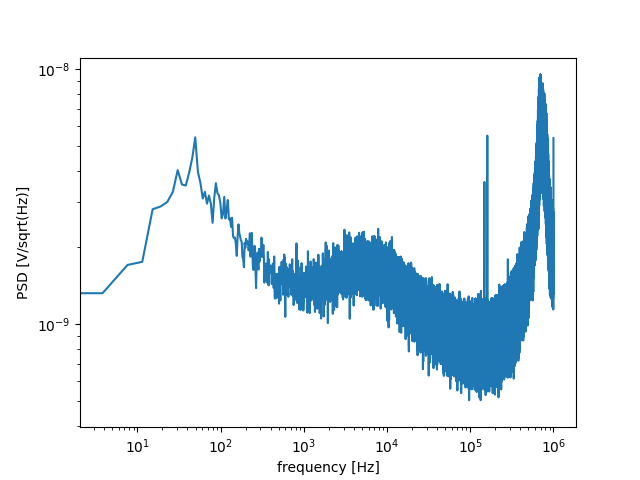

In [63]:
plt.figure()
f_BisBis, Pxx_den = signal.welch(s_BisBis, 2e6, nperseg=2**19, detrend='linear', average='median')
plt.loglog(f_BisBis, np.sqrt(Pxx_den)/(10**(69/20)))
#plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V/sqrt(Hz)]')
plt.show()

In [65]:
df_BisBis=pds.read_csv("/home/jli/Documents/lpp/TF_AMP_JFE_Ids=1.19mA,R6=3.3k,R7=500_V2.csv", index_col=[0], sep=",")
G_BisBis = df_BisBis["Channel 2 Magnitude (dB)"]-df_BisBis["Channel 1 Magnitude (dB)"]+33


[]

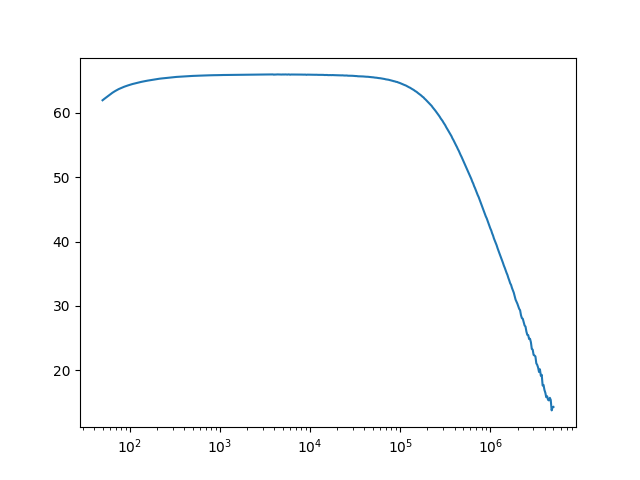

In [66]:
plt.figure()
plt.plot(G_BisBis)
plt.semilogx()

In [67]:
fG_BisBis = interpolate.interp1d(G_BisBis.index.values, G_BisBis.values)

[1.90734863e+02 1.94549561e+02 1.98364258e+02 ... 9.99992371e+05
 9.99996185e+05 1.00000000e+06]


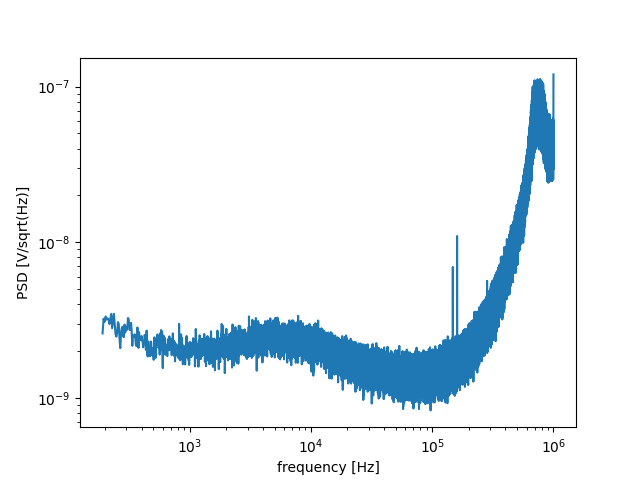

In [69]:
plt.figure()
f_BisBis, Pxx_den = signal.welch(s_BisBis, 2e6, nperseg=2**19, detrend='linear', average='median')
f_BisBis=f_BisBis[50:]
print(f_BisBis)
Pxx_den = Pxx_den[50:]
PSD_BisBis=np.sqrt(Pxx_den)/(10**(fG_BisBis(f_BisBis)/20))
with open('PSD_BisBisBisBis.npy', 'wb') as e:
    np.save(e,PSD_BisBis)
plt.loglog(f_BisBis, PSD_BisBis)
#plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V/sqrt(Hz)]')
plt.show()

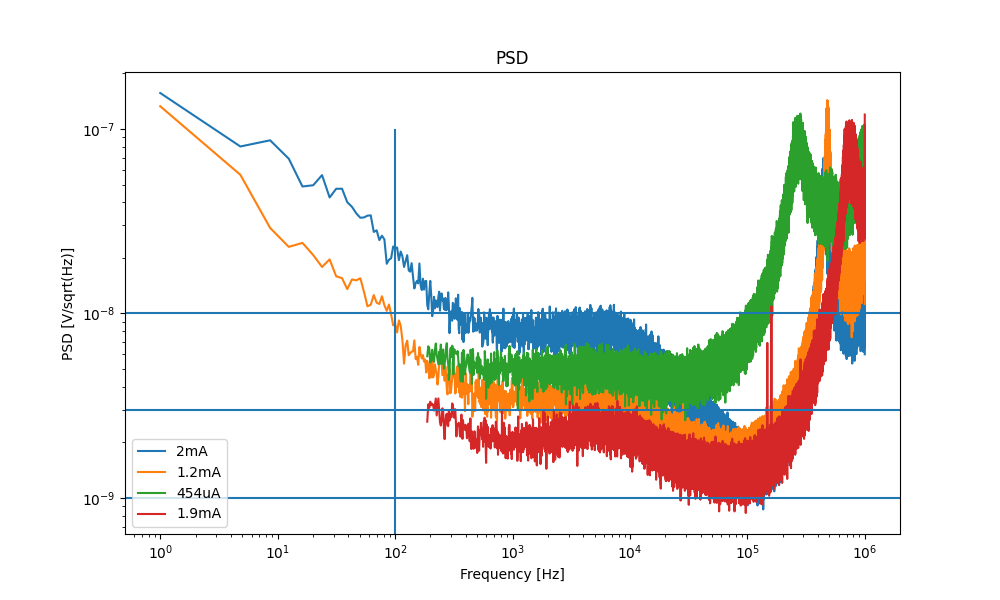

In [3]:
with open('PSD.npy', 'rb') as a:
    PSD = np.load(a)

with open('PSD_Bis.npy', 'rb') as b:
    PSD_Bis = np.load(b)

with open('PSD_BisBis.npy', 'rb') as c:
    PSD_BisBis = np.load(c)

with open('PSD_BisBisBis.npy', 'rb') as c:
    PSD_BisBisBis = np.load(c) #a été remplacer par BisBisBisBis

with open('PSD_BisBisBisBis.npy', 'rb') as c:
    PSD_BisBisBisBis = np.load(c)
    
plt.figure(figsize=(10, 6))
f_Bis=np.linspace(1,1e6,262144)
#plt.subplot(1, 2, 1)
plt.loglog(f_Bis, PSD,label='2mA')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [V/sqrt(Hz)]')
plt.title('PSD')


#plt.subplot(1, 2, 2)
plt.loglog(f_Bis, PSD_Bis,label='1.2mA')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [V/sqrt(Hz)]')

plt.loglog(f_Bis[49:], PSD_BisBis,label='454uA')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [V/sqrt(Hz)]')


plt.loglog(f_Bis[49:], PSD_BisBisBisBis,label='1.9mA')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [V/sqrt(Hz)]')

plt.hlines(1e-9,0,1e8)
plt.hlines(10e-9,0,1e8)
plt.hlines(3e-9,0,1e8)
plt.vlines(1e2,1e-10,1e-7)
plt.legend()
plt.show()


In [ ]:
with open('PSD_BisBisBisBis.npy', 'rb') as c:
    PSD_BisBisBisBis = np.load(c)

print( len(PSD_BisBisBisBis))

In [39]:
from scipy.interpolate import interp1d

In [57]:
k=1.3806e-23
T=273
R=286
L=3.5
C=22e-12
N=5886
S=np.pi*(0.005**2)
f_Bis=np.linspace(1,1e6,262095)


en=np.sqrt((PSD_BisBisBisBis**2) + 4*k*T*R )*np.sqrt((1-L*C*(2*np.pi*f_Bis)**2)**2 + (R*C*2*np.pi*f_Bis)**2)
Sensi= N*S*2*np.pi*f_Bis
NEMI=en/Sensi

df=pds.read_csv("/home/jli/Documents/lpp/FT_PCB_3*330uF_C10=10uF_ptDiv=1k_1stStage_&Bobine avec ferrite.csv", index_col=[0], sep=",")
G= df["Channel 2 Magnitude (dB)"]-df["Channel 1 Magnitude (dB)"]

plt.figure(figsize=(10, 6))
plt.plot(f_Bis, NEMI)
plt.xlabel('Fréquence (Hz)')
plt.ylabel('NEMI (T/√Hz )')
plt.title('NEMI en fonction de la fréquence')
plt.grid(True)
plt.xscale('log')
plt.yscale('log')

plt.figure(figsize=(10, 6))
plt.plot(G)
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.show()


NameError: name 'PSD_BisBisBisBis' is not defined

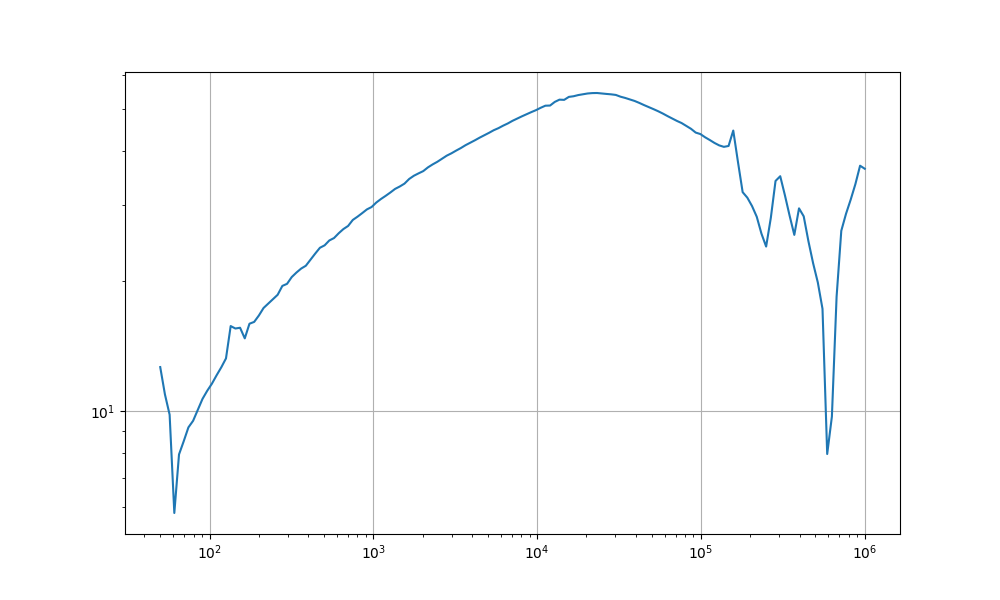

In [71]:
df=pds.read_csv("/home/jli/Documents/lpp/TF_Bobine_amp1stStage_S=210*140.csv", index_col=[0], sep=",")
G= df["Channel 2 Magnitude (dB)"]-df["Channel 1 Magnitude (dB)"]
plt.figure(figsize=(10, 6))
plt.plot(G)
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.show()

In [129]:
1/(2*3.14*500*1e-7)

3184.7133757961783